In [1]:
import pandas as pd
import torch
import tensorflow as tf
from tensorflow import keras
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
# from keras.optimizers import Adam
# from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import os
from tensorflow.keras.optimizers import RMSprop
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
mass_train=pd.read_csv('/content/drive/MyDrive/mass_case_description_train_set.csv')
mass_train['studyid']=mass_train['image file path'].apply(lambda x: x.split('/')[1])
mass_train['seriesid']=mass_train['image file path'].apply(lambda x: x.split('/')[2])
feature_label_train_mass=mass_train[['studyid','pathology']]

In [3]:
feature_label_train_mass

,studyid,pathology
0,1.3.6.1.4.1.9590.100.1.2.422112722213189649807...,MALIGNANT
1,1.3.6.1.4.1.9590.100.1.2.319478999311971442426...,MALIGNANT
2,1.3.6.1.4.1.9590.100.1.2.347107867812656628709...,BENIGN
3,1.3.6.1.4.1.9590.100.1.2.272600286511817402806...,BENIGN
4,1.3.6.1.4.1.9590.100.1.2.174047308712169195014...,BENIGN
...,...,...
1313,1.3.6.1.4.1.9590.100.1.2.964042733114858458386...,MALIGNANT
1314,1.3.6.1.4.1.9590.100.1.2.268797464411367674311...,MALIGNANT
1315,1.3.6.1.4.1.9590.100.1.2.791687062125620465047...,MALIGNANT
1316,1.3.6.1.4.1.9590.100.1.2.420341693811920799600...,MALIGNANT




1.   2nd element or index[1] of splitted image file path variable of description csv files represent **Study ID**.
2.   3rd element or index[2] represent **series iD**



In [15]:
cd drive/MyDrive/cbis_ddsm/mass/train/

/content/drive/MyDrive/cbis_ddsm/mass/train


In [17]:
cd benign

/content/drive/MyDrive/cbis_ddsm/mass/train/benign


In [20]:
img0=Image.open("1.3.6.1.4.1.9590.100.1.2.404229406313169688538822829192847964824.png")

In [22]:
img0.size

(2581, 5101)

#### **Labels are avaiable in description csv files**

In [37]:
np.random.seed(1000)

#Instantiate an empty model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(227, 227,1), kernel_size=(11,11), strides=(4,4), padding='same'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096)) #input_shape=(225*225,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

# 2nd Fully Connected Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))

# 3rd Fully Connected Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(1))
model.add(Activation('softmax'))

model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 57, 57, 96)        11712     
                                                                 
 activation_45 (Activation)  (None, 57, 57, 96)        0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 29, 29, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 29, 29, 256)       614656    
                                                                 
 activation_46 (Activation)  (None, 29, 29, 256)       0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 15, 15, 256)      0         
 g2D)                                                 

In [ ]:
# opt=tf.keras.optimizers.SGD(learning_rate=0.00001)
# model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,metrics=["accuracy"])

In [26]:
train_dir="/content/drive/MyDrive/cbis_ddsm/mass/train"
validation_dir="/content/drive/MyDrive/cbis_ddsm/mass/train" #change it after uploading test data

In [27]:
ls /content/drive/MyDrive/cbis_ddsm/mass/train

benign/  benig_wo_callback/  malignant/


In [38]:

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(227, 227))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (227, 227))

Found 552 images belonging to 3 classes.
Found 552 images belonging to 3 classes.


In [ ]:
# model.fit(train_images, train_labels,epochs=10)

In [28]:
sgd = keras.optimizers.SGD(learning_rate=0.001, momentum=0.1)

In [29]:
model.compile(loss="BinaryFocalCrossentropy", optimizer=sgd, metrics=["BinaryAccuracy"])

In [39]:
model.compile(optimizer=sgd,#RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
cd drive/MyDrive

[Errno 2] No such file or directory: 'drive/MyDrive'
/content/drive/MyDrive/cbis_ddsm/mass/train


In [ ]:
cd 'Colab Notebooks'

/content/drive/MyDrive/Colab Notebooks


In [ ]:
history = model.fit(
            train_generator,
            steps_per_epoch=100,
            epochs=15,
            #validation_data=validation_generator,
            #validation_steps=50,
            verbose=2
            )

In [40]:
# model.fit(im_mega_array,label_array)
history = model.fit(train_generator, epochs=10)#,       validation_data=(test_images, test_labels))

Epoch 1/10
10/28 [=========>....................] - ETA: 2:28 - loss: 0.0000e+00 - accuracy: 0.4167

KeyboardInterrupt: ignored

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


KeyError: ignored

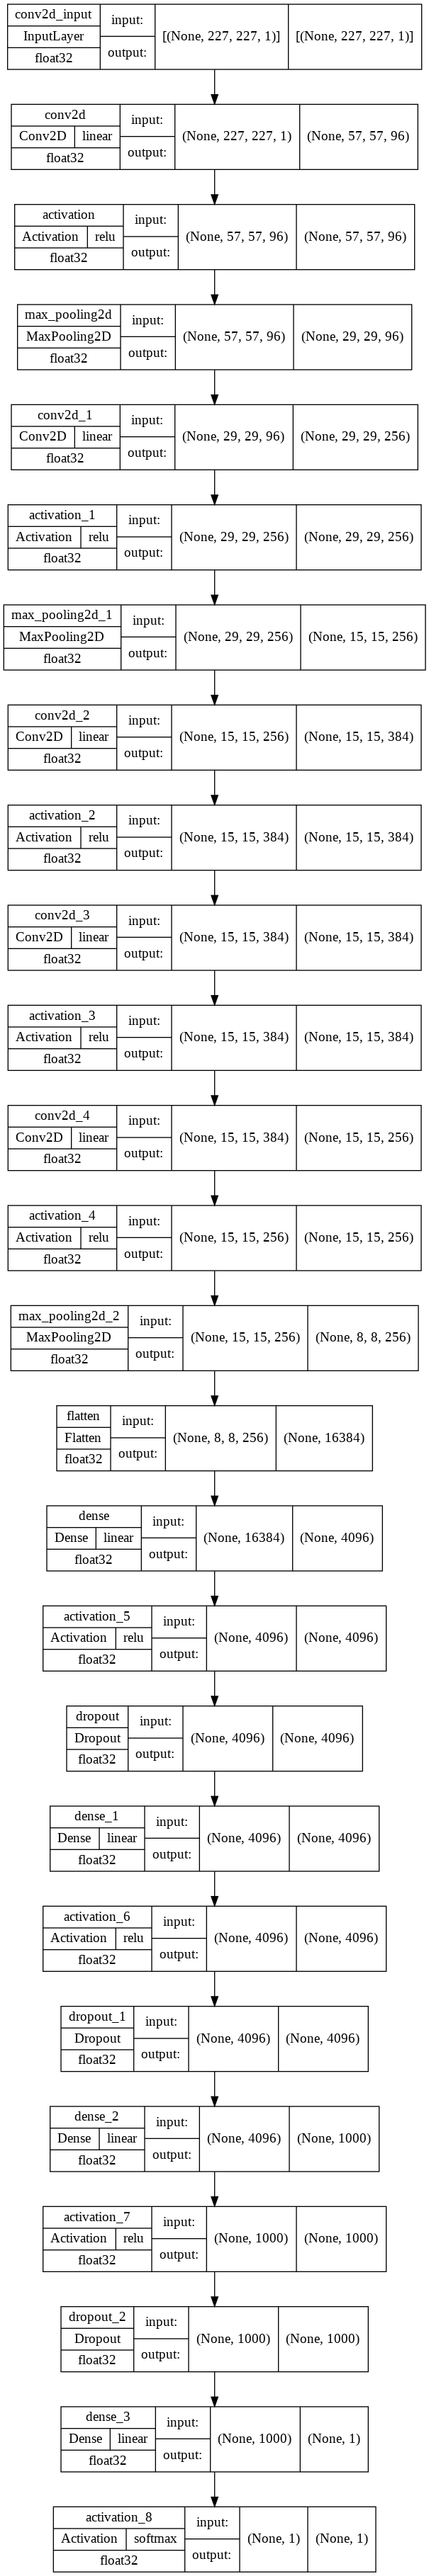

In [ ]:
keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_dtype=True, show_layer_names=True, rankdir='TB', expand_nested=True, dpi=96, layer_range=None, show_layer_activations=True)

In [ ]:
# im,lb=FinalGen(feature_label_train_mass.studyid,feature_label_train_mass.pathology,10)

In [ ]:
# asd=FinalGen(feature_label_train_mass.studyid,feature_label_train_mass.pathology,10)

In [ ]:
model.fit(im,lb)

In [ ]:
# model.fit_generator(generator=asd)

In [ ]:
# model0 = keras.applications.Xception(
#     weights='imagenet',
#     include_top=False,
#       # Load weights pre-trained on ImageNet.
#     input_shape=(299, 299,1))

In [ ]:
# ........ 